In [1]:
import os; os.chdir("..")  # change into root of working directory
import sys; sys.path.append("src")  # add src to system path and allow packages to be found
import pandas as pd
from glob import glob
import itertools as it
from datetime import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
import evaluation.calc as calc
from image.analysis import Data

import meta data

In [2]:
meta = Data.read_meta("data/pics_classic/meta/*meta.csv").sort_values(["date","id"])
meta

,date,id,time,hash,atnight,iso,focal_length,exposure_time,f_value,max_aperture,camera,night,picture
0,2020-12-10,1,084426,2939149992,False,800.0,3653/100,1/25,11.0,493/128,Panasonic DC-FZ10002,NaN,0
1,2020-12-10,1,084803,2950475878,False,800.0,3653/100,1/25,11.0,493/128,Panasonic DC-FZ10002,NaN,1
2,2020-12-10,1,084805,2949361144,False,800.0,3653/100,1/25,11.0,493/128,Panasonic DC-FZ10002,NaN,2
3,2020-12-10,1,084805,2952791180,False,800.0,3653/100,1/25,11.0,493/128,Panasonic DC-FZ10002,NaN,3
4,2020-12-10,1,084806,2954139687,False,800.0,3653/100,1/25,11.0,493/128,Panasonic DC-FZ10002,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2021-05-07,79,164413,1879306064,False,400.0,719/20,1/25,5.0,493/128,Panasonic DC-FZ10002,NaN,1
265,2021-05-07,79,164414,1876337448,False,400.0,719/20,1/25,5.0,493/128,Panasonic DC-FZ10002,NaN,2
266,2021-05-07,80,163858,2137310492,False,400.0,719/20,1/25,5.0,493/128,Panasonic DC-FZ10002,NaN,0
267,2021-05-07,80,163859,2137735124,False,400.0,719/20,1/25,5.0,493/128,Panasonic DC-FZ10002,NaN,1


import measurements. Make sure to execute read_measurements.py beforehand to gather all measurement data

In [4]:
measurements = Data.read_measurements("data/measurements.csv").sort_values(["date","id"])
measurements

,date,id,conductivity,temperature,oxygen,NH4,NO2,NO3,NO3N,PO4,turbidity,pH
0,2020-11-10,1,1009.000,20.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.570
1,2020-11-10,2,995.000,20.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.580
2,2020-11-10,3,995.000,20.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.580
3,2020-11-10,4,1023.000,20.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.580
4,2020-11-10,5,1019.000,20.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.580
...,...,...,...,...,...,...,...,...,...,...,...,...
4757,2021-05-07,77,1026.392,20.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.261
4755,2021-05-07,78,973.862,19.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.256
4756,2021-05-07,78,978.487,19.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.258
4759,2021-05-07,79,1011.660,20.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.286


join both dataframes

In [5]:
meta = meta.groupby(["date","id"]).aggregate("first").reset_index() # get only the first entry of all pictures of each id on one day
data = meta.merge(measurements, how="left", on=["date","id"]).query("id != 34") # remove id 34 because it mostly provides wrong values due to continuous measurements
data

,date,id,time,hash,atnight,iso,focal_length,exposure_time,f_value,max_aperture,...,conductivity,temperature,oxygen,NH4,NO2,NO3,NO3N,PO4,turbidity,pH
0,2020-12-10,1,084426,2939149992,False,800.0,3653/100,1/25,11.0,493/128,...,NaN,20.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-10,2,085035,2987928591,False,800.0,3653/100,1/25,11.0,493/128,...,NaN,20.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-10,3,090427,2866726574,False,800.0,719/20,1/25,11.0,493/128,...,NaN,20.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-10,4,090221,2971783394,False,800.0,719/20,1/25,11.0,493/128,...,NaN,20.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-10,5,091122,3276059639,False,800.0,3653/100,1/25,11.0,493/128,...,NaN,20.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4525,2021-05-07,77,163528,1256932583,False,400.0,719/20,1/25,5.0,493/128,...,1026.392,20.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.261
4526,2021-05-07,78,163116,2156546627,False,400.0,719/20,1/25,5.0,493/128,...,973.862,19.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.256
4527,2021-05-07,78,163116,2156546627,False,400.0,719/20,1/25,5.0,493/128,...,978.487,19.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.258
4528,2021-05-07,79,164413,1878155662,False,400.0,719/20,1/25,5.0,493/128,...,1011.660,20.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.286


## exploration of raw data

look at the times at which pictures and respectively phyicochemical measurements were taken throughout the day

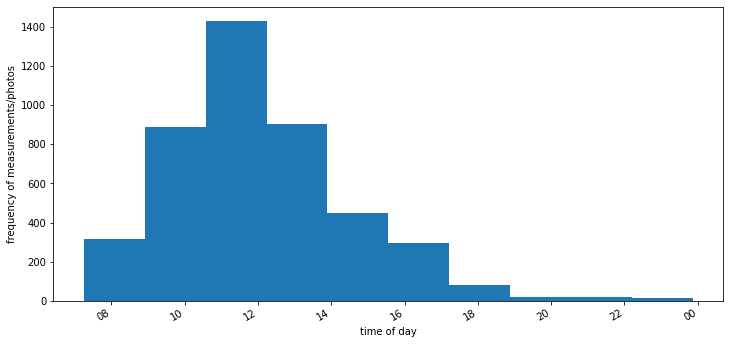

In [6]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.hist(np.array(pd.to_datetime(data.time, format="%H%M%S")))

# format your data to desired format. Here I chose YYYY-MM-DD but you can set it to whatever you want.
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H"))
ax.set_xlabel("time of day")
ax.set_ylabel("frequency of measurements/photos")

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

plt.show()

look at the relation between time and physicochemical measurements

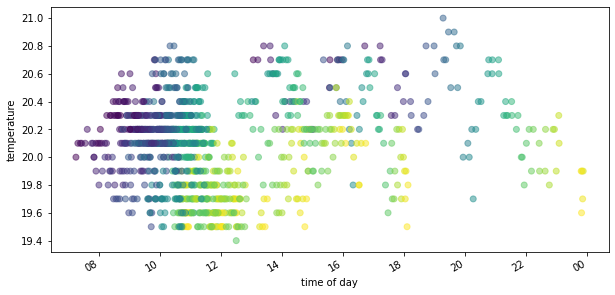

In [7]:
# data 
pdat = data[["id","time","temperature", "date"]]
x = np.array(pd.to_datetime(pdat.date, format="%Y-%m-%d"))
x2 = np.array(pd.to_datetime(pdat.time, format="%H%M%S"))
y = np.array(pdat.temperature)
g = np.array(pdat.id)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(x2,y,c=g, alpha=.5)

# format your data to desired format. Here I chose YYYY-MM-DD but you can set it to whatever you want.
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H"))
ax.set_xlabel("time of day")
ax.set_ylabel("temperature")
# rotate and align the tick labels so they look better
fig.autofmt_xdate()

plt.show()

plot ph

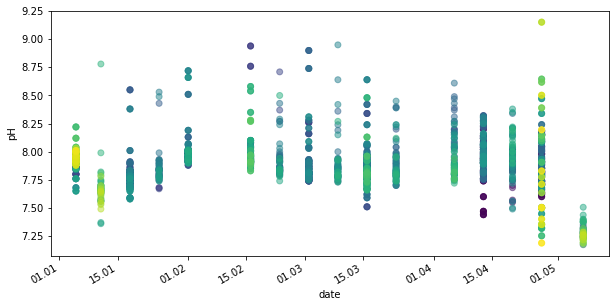

In [8]:
# data 
pdat = data[["date","time","pH"]]
x = np.array(pd.to_datetime(pdat.date, format="%Y-%m-%d"))
y = np.array(pdat.pH)
g = np.array(pd.to_datetime(pdat.time, format="%H%M%S"))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(x,y,c=g, alpha=.5)

# format your data to desired format. Here I chose YYYY-MM-DD but you can set it to whatever you want.
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))
ax.set_xlabel("date")
ax.set_ylabel("pH")
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.show()

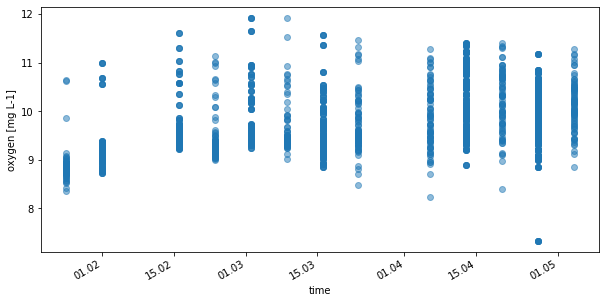

In [9]:
pdat = data[["date","time","oxygen", "id"]]
x = np.array(pd.to_datetime(pdat.date, format="%Y-%m-%d"))
y = np.array(pdat.oxygen)
g = np.array(pd.to_datetime(pdat.time, format="%H%M%S"))
shelf = np.where(np.array(pdat.id) <= 40, 0, 1)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(x,y,c="tab:blue", alpha=.5)

# format your data to desired format. Here I chose YYYY-MM-DD but you can set it to whatever you want.
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))
ax.set_xlabel("time")
ax.set_ylabel("oxygen [mg L-1]")
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.show()

In [10]:
data[["oxygen"]]

,oxygen
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4525,NaN
4526,NaN
4527,NaN
4528,NaN


In [11]:
def regression_datetime(df, x_col, y_col, ax=None):
    df = df[[x_col, y_col]].dropna()
    x = np.array(pd.to_datetime(df[x_col], format="%H%M%S")).astype(float)
    y = np.array(df[y_col])
    m, b = np.polyfit(x, y, 1)
    
    if ax is None:
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111)
    ax.scatter(pd.to_datetime(x),y)
    ax.plot(pd.to_datetime(x), m*x + b, color="gray", alpha=.5)
    
    if ax is None:
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%H"))
        ax.set_xlabel("time of day")
        ax.set_ylabel("temperature")
        fig.autofmt_xdate()


In [12]:
pdat = data[["id","time","pH"]].query("id == 36")
pdat
# regression_datetime(pdat,"time","temperature")



,id,time,pH
35,36,101108,NaN
113,36,125714,NaN
192,36,195543,NaN
270,36,121731,NaN
349,36,123709,NaN
...,...,...,...
4021,36,111341,NaN
4022,36,111341,7.953
4322,36,110753,NaN
4403,36,143706,NaN
